In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [118]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OneHotEncoder

In [137]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.mixture import GaussianMixture

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
scaler = StandardScaler()

#Wczytywanie danych#

In [50]:
X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/y_test.txt', delim_whitespace=True, header=None)

X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/y_train.txt', delim_whitespace=True, header=None)

<ipython-input-50-6105b875e9c1>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None)
<ipython-input-50-6105b875e9c1>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv('/content/y_test.txt', delim_whitespace=True, header=None)
<ipython-input-50-6105b875e9c1>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-50-6105b875e9c1>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('/content/y_train.tx

In [51]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [52]:
features = pd.read_csv('/content/features.txt', delim_whitespace=True , header=None)
X_train_scaled.columns = features.values
X_test_scaled.columns = features.values

X_train_scaled.columns = X_train_scaled.columns.astype(str).str.replace(r"^\(\d+,\s*", "", regex=True).str.replace(r"\)", "", regex=True).str.replace("'", "")
X_test_scaled.columns = X_test_scaled.columns.astype(str).str.replace(r"^\(\d+,\s*", "", regex=True).str.replace(r"\)", "", regex=True).str.replace("'", "")
X_train_scaled.columns = X_train_scaled.columns.str.lstrip("'")
X_test_scaled.columns = X_test_scaled.columns.str.lstrip("'")

X_train_scaled.head(4)

<ipython-input-52-0081d0e57aff>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('/content/features.txt', delim_whitespace=True , header=None)


,tBodyAcc-mean(-X,tBodyAcc-mean(-Y,tBodyAcc-mean(-Z,tBodyAcc-std(-X,tBodyAcc-std(-Y,tBodyAcc-std(-Z,tBodyAcc-mad(-X,tBodyAcc-mad(-Y,tBodyAcc-mad(-Z,tBodyAcc-max(-X,...,fBodyBodyGyroJerkMag-meanFreq(,fBodyBodyGyroJerkMag-skewness(,fBodyBodyGyroJerkMag-kurtosis(,"angle(tBodyAccMean,gravity","angle(tBodyAccJerkMean,gravityMean","angle(tBodyGyroMean,gravityMean","angle(tBodyGyroJerkMean,gravityMean","angle(X,gravityMean","angle(Y,gravityMean","angle(Z,gravityMean"
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714


#EDA#

In [53]:
datas = [X_train, X_test, y_train, y_test]

for i, data in enumerate(datas):
  print(f'--{i}--')
  print(data.isnull().mean().sum())
  print(data.shape)

--0--
0.0
(7352, 561)
--1--
0.0
(2947, 561)
--2--
0.0
(7352, 1)
--3--
0.0
(2947, 1)


In [54]:
X_train_t = X_train_scaled.loc[:, X_train_scaled.columns.str.startswith('t')]
X_test_t = X_test_scaled.loc[:, X_test_scaled.columns.str.startswith('t')]
X_train_t

,tBodyAcc-mean(-X,tBodyAcc-mean(-Y,tBodyAcc-mean(-Z,tBodyAcc-std(-X,tBodyAcc-std(-Y,tBodyAcc-std(-Z,tBodyAcc-mad(-X,tBodyAcc-mad(-Y,tBodyAcc-mad(-Z,tBodyAcc-max(-X,...,tBodyGyroJerkMag-max(,tBodyGyroJerkMag-min(,tBodyGyroJerkMag-sma(,tBodyGyroJerkMag-energy(,tBodyGyroJerkMag-iqr(,tBodyGyroJerkMag-entropy(,tBodyGyroJerkMag-arCoeff(1,tBodyGyroJerkMag-arCoeff(2,tBodyGyroJerkMag-arCoeff(3,tBodyGyroJerkMag-arCoeff(4
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.742891,-0.755731,-0.820778,-0.541612,-0.792762,-1.037729,0.054269,0.215652,-0.430526,-0.030941
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.770581,-0.749882,-0.823850,-0.541772,-0.793901,-1.195417,-0.289754,0.209852,-0.241393,0.296452
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.766268,-0.772197,-0.817815,-0.541658,-0.790422,-1.099048,0.199246,0.321517,-0.761916,0.036612
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,-0.766268,-0.772197,-0.825179,-0.541775,-0.794662,-1.127618,1.300611,-0.200045,-1.183357,-0.193125
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.755459,-0.750619,-0.826251,-0.541789,-0.800869,-1.180422,0.215012,-0.181049,-0.430018,0.445183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,0.189767,1.396171,0.584175,0.035010,0.384116,1.045331,-1.169391,1.560716,-1.324350,0.513875
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,0.337435,0.786578,0.541065,-0.006970,0.328500,1.015337,0.008204,0.138293,-0.822541,0.542508
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,0.397878,0.786578,0.502600,-0.018282,0.378336,1.011269,-0.138170,0.921242,-1.331962,0.133981
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,0.397878,0.385351,0.415701,-0.066540,0.207443,0.860731,-1.170948,1.583823,-1.279964,0.470734


Dane do modeli sa przeskalowane oraz ograniczona zostala ilosc danych do tych kluczowych wegdlug pliku READme.txt

    Nazwy zmiennych:
      X_test_t
      X_train_t
      y_train
      y_test

Wybranie najwazniejszygch głównych zmiennych

In [55]:
X_test_t = X_test_t[[]]

#PCA#

In [56]:
pca = PCA(random_state = 42)

Wybranie najważniejszych cech pozwalających wyróżnić klasy

In [57]:
# Metoda 1: Selekcja cech za pomocą RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_t, y_train)

# Pobranie rankingów cech
feature_importances = pd.Series(model.feature_importances_, index=X_train_t.columns)
top_features = feature_importances.nlargest(10)  # Wybór 10 najlepszych cech
print("Najważniejsze cechy wg RandomForest:")
print(top_features)

# Metoda 2: SelectKBest (wybór najlepszych cech na podstawie ANOVA)
selector = SelectKBest(score_func=f_classif, k=10)  # Wybierz 10 najlepszych cech
X_new = selector.fit_transform(X_train_t, y_train)
selected_features = X_train_t.columns[selector.get_support()]
print("\nNajlepsze cechy wg SelectKBest:")
print(selected_features)

# Metoda 3: PCA - Redukcja wymiarowości do 3 głównych składowych
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_t)

print("\nWariancja wyjaśniona przez PCA:", pca.explained_variance_ratio_)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Najważniejsze cechy wg RandomForest:
tGravityAcc-mean(-X      0.049283
tGravityAcc-min(-Y       0.036009
tGravityAcc-min(-X       0.035366
tGravityAcc-mean(-Y      0.034905
tGravityAcc-energy(-X    0.034853
tGravityAcc-max(-Y       0.033382
tGravityAcc-max(-X       0.033350
tBodyAccJerkMag-sma(     0.019301
tGravityAcc-mean(-Z      0.018682
tBodyAcc-std(-X          0.016896
dtype: float64

Najlepsze cechy wg SelectKBest:
Index(['tBodyAcc-std(-X', 'tBodyAcc-max(-X', 'tGravityAcc-mean(-X',
       'tGravityAcc-max(-X', 'tGravityAcc-min(-X', 'tGravityAcc-energy(-X',
       'tBodyAccJerk-entropy(-X', 'tBodyAccJerk-entropy(-Y',
       'tBodyAccJerk-entropy(-Z', 'tBodyAccJerkMag-entropy('],
      dtype='object')

Wariancja wyjaśniona przez PCA: [0.47367812 0.07660666 0.03982331]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wybranie najlepszych kolumn do modelu na podstawie SelectKBest:

In [62]:
X_test_t = X_train_t[selected_features]
X_train_t = X_train_t[selected_features]
X_test_t.head()

,tBodyAcc-std(-X,tBodyAcc-max(-X,tGravityAcc-mean(-X,tGravityAcc-max(-X,tGravityAcc-min(-X,tGravityAcc-energy(-X,tBodyAccJerk-entropy(-X,tBodyAccJerk-entropy(-Y,tBodyAccJerk-entropy(-Z,tBodyAccJerkMag-entropy(
0,-0.868814,-0.856036,0.579172,0.564447,0.587729,0.663114,-1.103019,-1.088176,-1.229514,-1.085355
1,-0.875426,-0.871359,0.585297,0.564459,0.601656,0.675094,-1.187443,-0.872075,-1.031748,-1.025556
2,-0.869039,-0.863323,0.585910,0.565126,0.606080,0.676296,-1.001490,-0.900188,-0.998740,-0.991118
3,-0.870626,-0.863323,0.587337,0.567903,0.606180,0.679094,-1.104328,-1.028411,-1.126010,-0.987594
4,-0.875188,-0.870260,0.588516,0.567903,0.607384,0.681407,-1.150162,-1.014739,-1.079905,-1.066943


    Najważniejsze zmienne z danymi:
      X_test_t
      X_train_t
      y_train
      y_test

In [68]:
pca = PCA(random_state = 42)

X_train_pca = pca.fit_transform(X_train_t)
X_test_pca = pca.transform(X_test_t)

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

Główna składowa: 1, Wyjaśniona wariancja: 0.69952, Skumulowana Wyjaśniona wariancja: 0.69952
Główna składowa: 2, Wyjaśniona wariancja: 0.26837, Skumulowana Wyjaśniona wariancja: 0.96788
Główna składowa: 3, Wyjaśniona wariancja: 0.02142, Skumulowana Wyjaśniona wariancja: 0.98931
Główna składowa: 4, Wyjaśniona wariancja: 0.00318, Skumulowana Wyjaśniona wariancja: 0.99248
Główna składowa: 5, Wyjaśniona wariancja: 0.00262, Skumulowana Wyjaśniona wariancja: 0.9951
Główna składowa: 6, Wyjaśniona wariancja: 0.00195, Skumulowana Wyjaśniona wariancja: 0.99705
Główna składowa: 7, Wyjaśniona wariancja: 0.00179, Skumulowana Wyjaśniona wariancja: 0.99885
Główna składowa: 8, Wyjaśniona wariancja: 0.00069, Skumulowana Wyjaśniona wariancja: 0.99954
Główna składowa: 9, Wyjaśniona wariancja: 0.00044, Skumulowana Wyjaśniona wariancja: 0.99997
Główna składowa: 10, Wyjaśniona wariancja: 3e-05, Skumulowana Wyjaśniona wariancja: 1.0


    W dwóch Głównych Składowych skumulowana wyjaśniona wariancja wynosi aż 96%

In [70]:
pca = PCA(n_components=2, random_state = 42)

X_train_pca = pca.fit_transform(X_train_t)
X_test_pca = pca.transform(X_test_t)

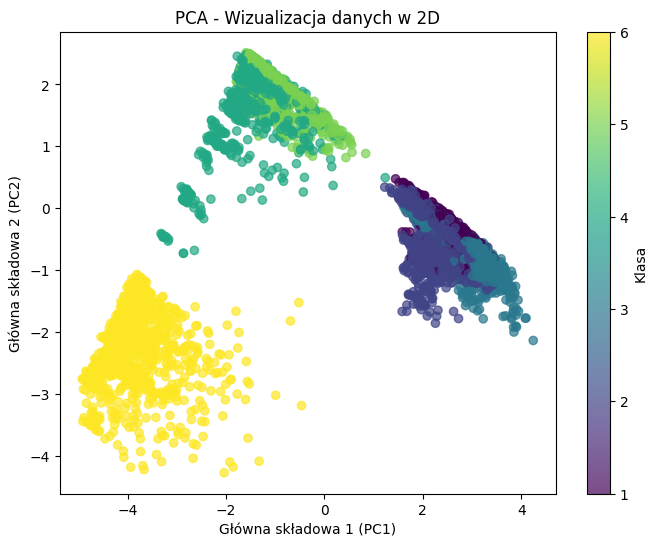

In [71]:
# Rysowanie wykresu 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel("Główna składowa 1 (PC1)")
plt.ylabel("Główna składowa 2 (PC2)")
plt.title("PCA - Wizualizacja danych w 2D")
plt.colorbar(label="Klasa")
plt.show()

#KMeans#

##Wizualizacja##

In [72]:
def visualize_kmeans_clusters(train_data, train_labels, model):
    # Redukcja wymiarowości do 2D za pomocą PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(train_data)

    # Klasteryzacja K-Means
    kmeans_labels = model.fit_predict(reduced_data)

    # Wizualizacja wyników
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroidy')
    plt.title("Wizualizacja klastrów K-Means (PCA)")
    plt.legend()
    plt.show()

##Model Kmeans##

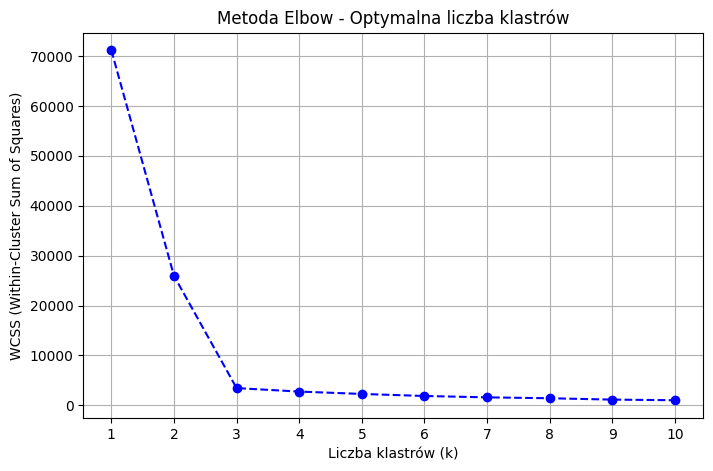

In [80]:
wcss = []  # Lista do przechowywania wartości WCSS dla różnych k

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)  # inertia_ to suma kwadratów odległości

# Rysowanie wykresu Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1,  11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Metoda Elbow - Optymalna liczba klastrów")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()




In [87]:
KMeans_model = KMeans(n_clusters=3, random_state=42)
KMeans_model.fit(X_train_pca)

KMeans(n_clusters=3, random_state=42)

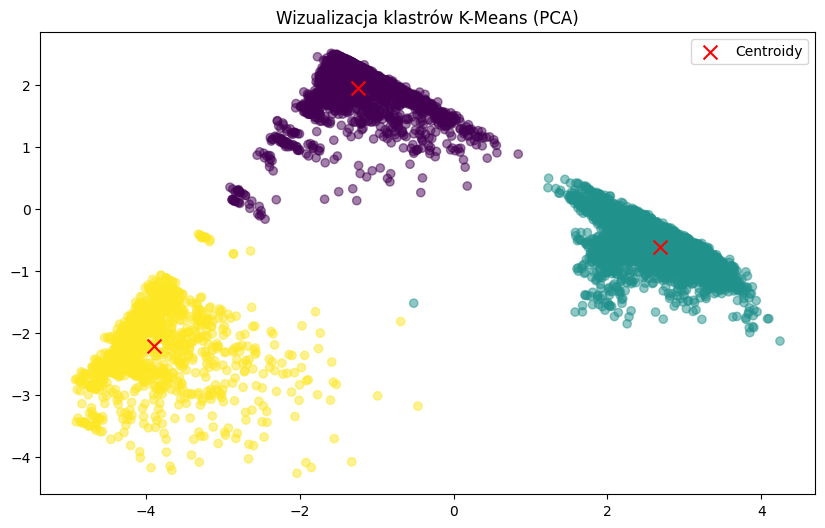

In [88]:
visualize_kmeans_clusters(X_train_pca, y_train, KMeans_model)

In [91]:
KMeans_pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=3, random_state=42, max_iter = 1000)),
    ('logreg', LogisticRegression(random_state=42, solver = 'saga'))
])

list(KMeans_pipeline.get_params().keys())

KMeans_pipeline.fit(X_train_pca, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('kmeans',
                 KMeans(max_iter=1000, n_clusters=3, random_state=42)),
                ('logreg', LogisticRegression(random_state=42, solver='saga'))])

In [93]:
params = {'kmeans__max_iter' : [1000, 2000, 3000],
          'logreg__C' : np.logspace(-4,4, 20),
          'logreg__max_iter' : [1000, 2000, 3000],
          'logreg__multi_class' : ['ovr', 'multinomial']}

grid_search = GridSearchCV(KMeans_pipeline, params, cv=3, verbose=1, n_jobs=-1, error_score='raise')
grid_search.fit(X_train_pca, y_train)

print('Wybrane hiperparametry: ', grid_search.best_params_)

Model1 = grid_search.best_estimator_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Wybrane hiperparametry:  {'kmeans__max_iter': 1000, 'logreg__C': 0.23357214690901212, 'logreg__max_iter': 1000, 'logreg__multi_class': 'ovr'}


    Wybrane najelpsze hiperparametry:
      Fitting 3 folds for each of 360 candidates, totalling 1080 fits
      /usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
        y = column_or_1d(y, warn=True)
      /usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
        warnings.warn(
      Wybrane hiperparametry:  {'kmeans__max_iter': 1000, 'logreg__C': 0.23357214690901212, 'logreg__max_iter': 1000, 'logreg__multi_class': 'ovr'}

Z Kmeans

In [97]:
print(classification_report(y_train, KMeans_pipeline.predict(X_train_pca)))

              precision    recall  f1-score   support

           1       0.60      0.76      0.67      1226
           2       0.73      0.53      0.62      1073
           3       0.76      0.74      0.75       986
           4       0.68      0.46      0.55      1286
           5       0.61      0.79      0.69      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.72      7352
   macro avg       0.73      0.71      0.71      7352
weighted avg       0.73      0.72      0.72      7352



Bez Kmeans - te same parametry dla logreg


In [99]:
model_2 = LogisticRegression(C = 0.23357214690901212, max_iter = 1000, multi_class = 'ovr', random_state=42, solver = 'saga')
model_2.fit(X_train_pca, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.23357214690901212, max_iter=1000, multi_class='ovr',
                   random_state=42, solver='saga')

In [101]:
print(classification_report(y_train, model_2.predict(X_train_pca)))

              precision    recall  f1-score   support

           1       0.61      0.78      0.68      1226
           2       0.77      0.52      0.62      1073
           3       0.75      0.75      0.75       986
           4       0.74      0.39      0.51      1286
           5       0.61      0.87      0.72      1374
           6       0.99      1.00      0.99      1407

    accuracy                           0.73      7352
   macro avg       0.74      0.72      0.71      7352
weighted avg       0.75      0.73      0.72      7352



    lekka róznica w rozróznianiu klas

    najlepiej z : 1 (marsz), 5 (stanie), 6 (lezenie)

    najgorzej z : 4 (siedzenie)

#DBSCAN#

##Wizualizacja##

In [106]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

##DBSCAN##

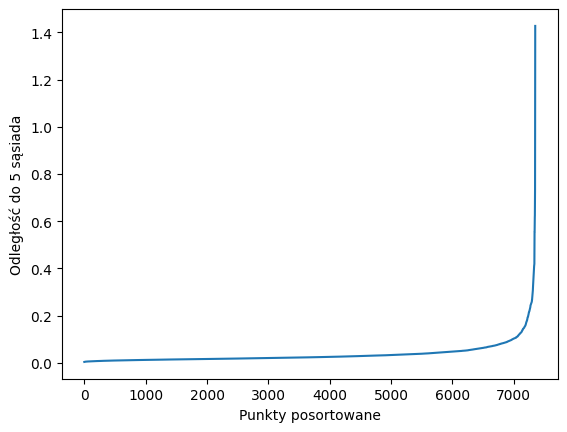

In [104]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X_train_pca)
distances, indices = nbrs.kneighbors(X_train_pca)

distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.xlabel("Punkty posortowane")
plt.ylabel("Odległość do 5 sąsiada")
plt.show()

Liczba klastrów: 6
Liczba punktów w szumie: 560
7352


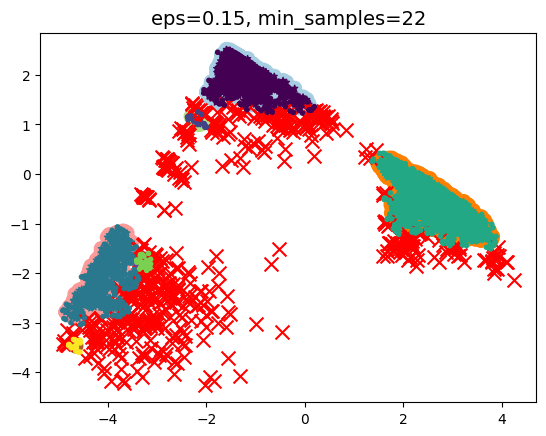

In [116]:
dbscan = DBSCAN(eps=0.15, min_samples= 22)
labels = dbscan.fit_predict(X_train_pca)

# Liczba klastrów (bez szumu)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

plot_dbscan(dbscan, X_train_pca, size=100)

print(f"Liczba klastrów: {n_clusters}")
print(f"Liczba punktów w szumie: {np.sum(labels == -1)}")
print(X_train_pca.shape[0])

Zapisanie centriodó do danych testowych i treningowych

In [120]:
X_train_db = pd.DataFrame(X_train_pca)
X_train_db["Cluster"] = pd.Series(labels)

# Filtrujemy tylko punkty, które DBSCAN przypisał do klastrów (pomijamy szum)
X_train_clusters = X_train_db[labels != -1]  # Usunięcie punktów oznaczonych jako -1 (szum)
y_clusters = labels[labels != -1]  # Zachowanie tylko prawidłowych etykiet klastrów

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clusters.drop(columns=["Cluster"]), y_clusters)

# Konwersja danych testowych do DataFrame
X_test_db = pd.DataFrame(X_test_pca)

# Przewidywanie klastrów dla danych testowych na podstawie KNN
X_test_db["Cluster"] = knn.predict(X_test_db)

encoder = OneHotEncoder(sparse_output = False, drop = 'first')  # drop='first' unika pułapki wielokolinearności
cluster_encoded = encoder.fit_transform(X_train_db[["Cluster"]])

# Konwersja na DataFrame i dodanie do X_train
cluster_df = pd.DataFrame(cluster_encoded, columns=[f"Cluster_{i}" for i in range(cluster_encoded.shape[1])], index=X_train_db.index)
X_train_db = pd.concat([X_train_db.drop(columns=["Cluster"]), cluster_df], axis=1)

cluster_encoded = encoder.transform(X_test_db[["Cluster"]])

# Konwersja na DataFrame i dodanie do X_train
cluster_df = pd.DataFrame(cluster_encoded, columns=[f"Cluster_{i}" for i in range(cluster_encoded.shape[1])], index=X_test_db.index)
X_test_db = pd.concat([X_test_db.drop(columns=["Cluster"]), cluster_df], axis=1)

# Konwersja nazw kolumn na stringi
X_train_db.columns = X_train_db.columns.astype(str)
X_test_db.columns = X_test_db.columns.astype(str)

In [122]:
params = {'min_samples_leaf' : [2, 3, 4],
          'max_depth' : [2, 3, 4],
          'n_estimators' : [200, 300, 500]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3, verbose=1, n_jobs=-1, error_score='raise')
grid_search.fit(X_train_db, y_train)

print('Wybrane hiperparametry: ', grid_search.best_params_)

Model2 = grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Wybrane hiperparametry:  {'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 200}


    najlepsze hiperparametry dla Model2:
      Fitting 3 folds for each of 27 candidates, totalling 81 fits
      /usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
        return fit_method(estimator, *args, **kwargs)
      Wybrane hiperparametry:  {'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 200}

Z DBSCAN

In [129]:
print(classification_report(y_train, Model2.predict(X_train_db)))

              precision    recall  f1-score   support

           1       0.59      0.77      0.67      1226
           2       0.71      0.45      0.55      1073
           3       0.76      0.76      0.76       986
           4       0.85      0.28      0.42      1286
           5       0.59      0.96      0.73      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.72      7352
   macro avg       0.75      0.70      0.69      7352
weighted avg       0.75      0.72      0.69      7352



Bez DBSCAN - te same hiperparametry

In [134]:
model2_1 = RandomForestClassifier(max_depth = 4, min_samples_leaf = 3, n_estimators = 200, random_state=42)
model2_1.fit(X_train_pca, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=4, min_samples_leaf=3, n_estimators=200,
                       random_state=42)

In [135]:
print(classification_report(y_train, model2_1.predict(X_train_pca)))

              precision    recall  f1-score   support

           1       0.61      0.77      0.68      1226
           2       0.72      0.52      0.60      1073
           3       0.77      0.76      0.76       986
           4       0.93      0.28      0.43      1286
           5       0.59      0.98      0.74      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.73      7352
   macro avg       0.77      0.72      0.70      7352
weighted avg       0.77      0.73      0.71      7352



    Najlepiej poradził sobie z : 3, 5, 6
    Najgorzej z : 4, 2

#GMM#

In [153]:
# Custom transformer for Gaussian Mixture
class GaussianMixtureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=3):
        self.n_components = n_components
        self.gmm = GaussianMixture(n_components=self.n_components, random_state=42, n_init = 10)

    def fit(self, X, y=None):
        self.gmm.fit(X)
        return self

    def transform(self, X):
        return self.gmm.predict_proba(X)

pipeline = Pipeline([
    ('gmm', GaussianMixtureTransformer(n_components=3)),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])
pipeline.fit(X_train_pca, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('gmm', GaussianMixtureTransformer()),
                ('classifier', RandomForestClassifier(random_state=42))])

Z GMM

In [154]:
print(classification_report(y_train, pipeline.predict(X_train_pca)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       1.00      1.00      1.00      1286
           5       1.00      1.00      1.00      1374
           6       1.00      1.00      1.00      1407

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352



Bez GMM

In [155]:
model_3 = RandomForestClassifier(random_state=42, n_estimators=100)
model_3.fit(X_train_pca, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [156]:
print(classification_report(y_train, model_3.predict(X_train_pca)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       1.00      1.00      1.00      1286
           5       1.00      1.00      1.00      1374
           6       1.00      1.00      1.00      1407

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352



#Pytania#

Czym różni się KMeans, k-Fold oraz Unsupervised Nearest Neoghbours

- Kmeans - algorytm klasyfikujący punkty na podstwie ich podobieństwa, wymaga określenia ilości klastrów, nalezy do Unsupervised Learning
- K-Fold - jest to algorytm walidacji krzyżowej polegający na tym, że zbiór jest dzielony za każdym razem na zbiory testowe i treningowe przy czym każdy z tych podzbiorów jest póżniej zbiorem testopwym (walidacyjnym), na podstawie jego ocenia się model
- Unsupervised Nearest Neighbours - algorytm Unsupervised Learning, którego działanie polega na znajdowaniu K najbliższych sąsiadów, nie wymaga określenia ilości klastrów ponieważ sam ją określa na podstawie odległości między punktami (w przeciwieństwie do KMeans), pomaga w znajdowaniu amonali oraz w klasteryzacji